In [1]:
import pandas as pd 
import numpy as ny
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

data_path = os.path.join("Dataset","Algerian_forest_fires_cleaned_dataset.csv")

data = pd.read_csv(r"H:\Pregrad_Course\Aman_Algerian_Forest_Fires\Dataset\Algerian_forest_fires_cleaned_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
data['Region'].value_counts()

Region
0    122
1    121
Name: count, dtype: int64

In [6]:
data['year'] = data['year'].replace(0,data['year'].mean())
data['ISI'] = data['ISI'].replace(0,data['ISI'].mean())
data['FWI'] = data['FWI'].replace(0,data['FWI'].mean())
data['Rain'] = data['Rain'].replace(0,data['Rain'].mean())

<Axes: >

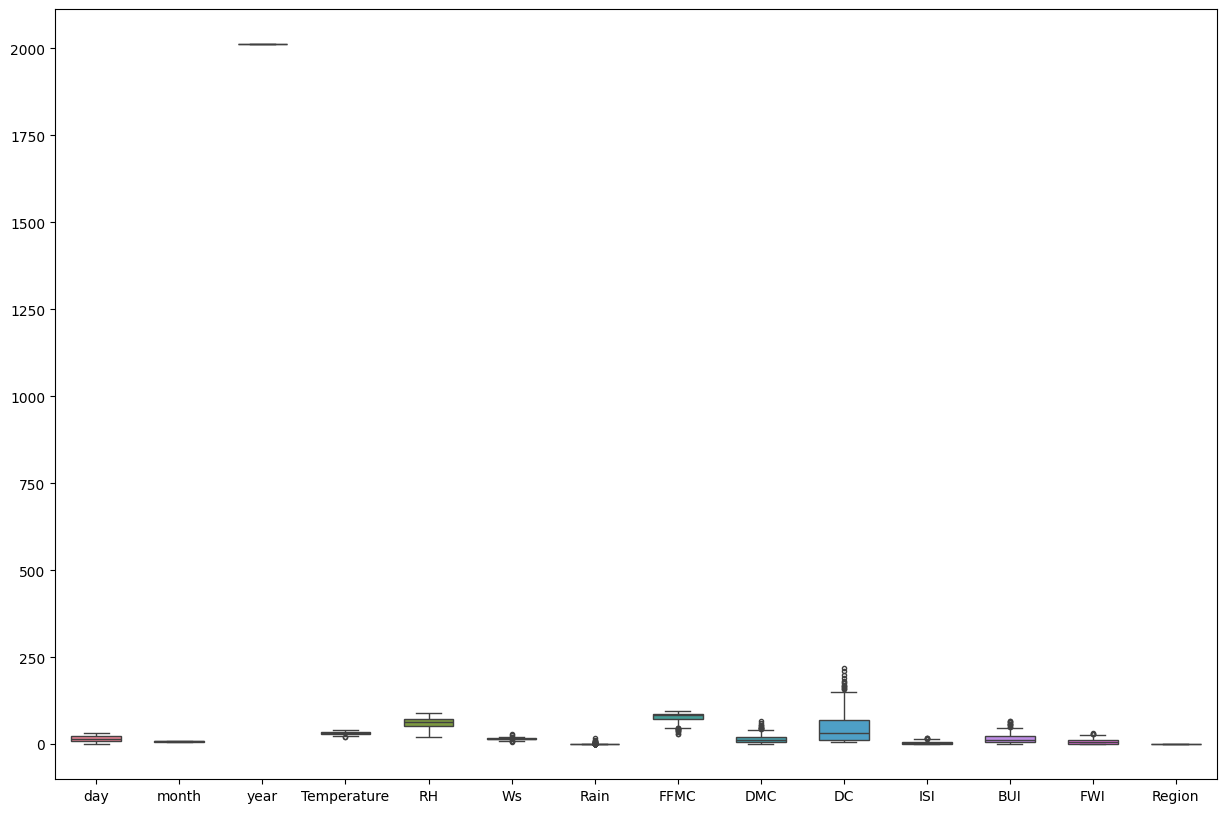

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.6,ax=ax, fliersize=3)

In [8]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.762963,65.7,3.4,7.6,1.300000,3.4,0.500000,not fire,0
1,2,6,2012,29,61,13,1.300000,64.4,4.1,7.6,1.000000,3.9,0.400000,not fire,0
2,3,6,2012,26,82,22,13.100000,47.1,2.5,7.1,0.300000,2.7,0.100000,not fire,0
3,4,6,2012,25,89,13,2.500000,28.6,1.3,6.9,4.742387,1.7,7.035391,not fire,0
4,5,6,2012,27,77,16,0.762963,64.8,3.0,14.2,1.200000,3.9,0.500000,not fire,0


In [9]:
x = data.drop(columns= ['Region'])
y = data['Region']

In [10]:
x

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.762963,65.7,3.4,7.6,1.300000,3.4,0.500000,not fire
1,2,6,2012,29,61,13,1.300000,64.4,4.1,7.6,1.000000,3.9,0.400000,not fire
2,3,6,2012,26,82,22,13.100000,47.1,2.5,7.1,0.300000,2.7,0.100000,not fire
3,4,6,2012,25,89,13,2.500000,28.6,1.3,6.9,4.742387,1.7,7.035391,not fire
4,5,6,2012,27,77,16,0.762963,64.8,3.0,14.2,1.200000,3.9,0.500000,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.762963,85.4,16.0,44.5,4.500000,16.9,6.500000,fire
239,27,9,2012,28,87,15,4.400000,41.1,6.5,8.0,0.100000,6.2,7.035391,not fire
240,28,9,2012,27,87,29,0.500000,45.9,3.5,7.9,0.400000,3.4,0.200000,not fire
241,29,9,2012,24,54,18,0.100000,79.7,4.3,15.2,1.700000,5.1,0.700000,not fire


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    1
240    1
241    1
242    1
Name: Region, Length: 243, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape, x_test.shape

((182, 14), (61, 14))

In [13]:
print(x_train.dtypes)

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object


In [14]:
x_test.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Drop or encode non-numeric columns (handle string data)
x_train = x_train.select_dtypes(include=['number']) 
x_test = x_test.select_dtypes(include=['number'])    

In [16]:
import pickle
from pathlib import Path
##standard Scaling- Standardization
def scaler_standard(x_train, x_test):
    #scaling the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    #saving the model
    # model_path = os.path.join('Model','standardScalar.pkl')
    file = open(r'H:\Pregrad_Course\Aman_Algerian_Forest_Fires\Model\standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return x_train_scaled, x_test_scaled

In [17]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [18]:
x_train_scaled

array([[ 0.19763619,  1.34865164,  0.        , ...,  0.88912536,
         0.7278858 ,  0.99325891],
       [-1.13870263,  1.34865164,  0.        , ..., -0.94590846,
        -0.93868129, -0.95483501],
       [-1.47278733,  0.44624503,  0.        , ...,  2.77003503,
        -0.03455178,  1.52573791],
       ...,
       [ 1.08852874,  1.34865164,  0.        , ..., -0.60183962,
        -0.75650594, -0.7860002 ],
       [ 0.19763619, -0.45616158,  0.        , ..., -0.12014324,
        -0.21672713, -0.22754661],
       [ 0.64308246, -0.45616158,  0.        , ...,  1.85251811,
         1.79394897,  2.29198819]], shape=(182, 13))

In [19]:
x_test_scaled

array([[ 3.08997758e-01,  1.34865164e+00,  0.00000000e+00,
        -8.63371954e-01, -2.72921871e-01, -5.40249712e-01,
        -2.23942469e-01,  7.69875468e-01, -2.11276144e-01,
        -2.10381315e-01,  6.13870285e-01, -2.16727126e-01,
         2.52983219e-01],
       [ 1.42261344e+00, -1.35856820e+00,  0.00000000e+00,
         1.28179795e+00, -1.64362804e+00, -8.88921512e-01,
        -3.02766753e-01,  5.52497959e-01,  2.11362151e-01,
        -3.04207885e-01, -7.42673987e-02,  2.61733410e-02,
        -7.16991005e-02],
       [-9.15979493e-01, -4.56161584e-01,  0.00000000e+00,
         2.09212999e-01,  4.45067072e-01,  1.20310929e+00,
        -2.23942469e-01,  5.10424892e-01, -2.11276144e-01,
        -3.70061316e-02,  2.00987675e-01, -1.35760304e-01,
         3.21992418e-02],
       [-1.36448515e-01,  4.46245028e-01,  0.00000000e+00,
         1.01365171e+00, -4.03465315e-01, -8.88921512e-01,
        -4.47875095e-01,  2.86035205e-01,  3.13495439e-02,
         8.33949201e-01, -3.26584549e

In [20]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [21]:
from sklearn.model_selection import GridSearchCV
import numpy as ny 
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1', 'l2'],
    'C'       : ny.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    }

In [22]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                  #model
                   param_grid = parameters, #hyperparameter
                   scoring='accuracy',      #metric for scoring
                   cv=12)                   #number of folds

clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=12, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [23]:
clf = RandomForestClassifier(n_estimators=100, random_state=40)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [24]:
clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')

In [25]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[22,  7],
       [15, 17]])

In [26]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [27]:
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
Accuracy

np.float64(0.639344262295082)

In [28]:
Precision = true_positive/(true_positive+false_positive)
Precision

np.float64(0.7586206896551724)

In [29]:
Recall = true_positive/(true_positive+false_negative)
Recall

np.float64(0.5945945945945946)

In [30]:
F1_score = 2*(Recall * Precision) / (Recall + Precision)
F1_score

np.float64(0.6666666666666667)

In [31]:
import pickle
file = open(r'H:\Pregrad_Course\Aman_Algerian_Forest_Fires\Model/modelforPrecision.pkl','wb')
pickle.dump(log_reg,file)
file.close

<function BufferedWriter.close()>